# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview

combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
num_mice = len(combined_data["Mouse ID"].unique())
num_mice

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ids = combined_data.loc[combined_data.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_ids

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data["Mouse ID"] == "g989",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data["Mouse ID"].isin(duplicate_ids)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = len(clean_df["Mouse ID"].unique())
num_mice_cleaned

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

stdv = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean': mean,
                          'Median': median,
                          'Variance': variance,
                          'Standard Dev.': stdv,
                          'SEM': SEM})


summary_df

,Mean,Median,Variance,Standard Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = clean_df.groupby('Drug Regimen')
agg_stats = agg_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
agg_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

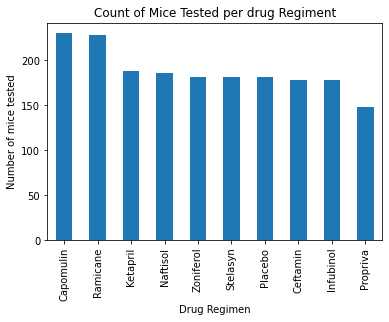

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
barplt = pd.value_counts(clean_df['Drug Regimen'])
barplt.plot(kind='bar')
plt.title("Count of Mice Tested per drug Regiment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")
plt.show()


In [13]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
regimen_group = clean_df.groupby('Drug Regimen')
count_regimen = regimen_group['Drug Regimen'].count()
count_regimen
count_regimen.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

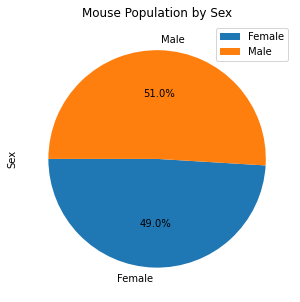

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
bygender = clean_df.groupby("Sex").count()
forpie = bygender["Mouse ID"].plot.pie(y='sizes', figsize=(5, 5), autopct="%1.1f%%",startangle=180, legend='true')
plt.title('Mouse Population by Sex')
plt.ylabel('Sex')

plt.savefig('piechart2')
plt.show()

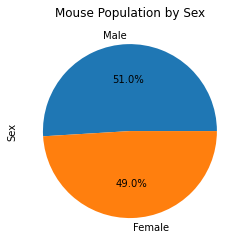

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = clean_df['Sex'].value_counts()
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Mouse Population by Sex')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for drug in drugs:
    final_tp = clean_df[clean_df['Timepoint']==clean_df['Timepoint'].iloc[-1]]
    tumorvol = final_tp[final_tp['Drug Regimen']==drug]
    reg_tumorvol = tumorvol['Tumor Volume (mm3)']
    
    quartiles = reg_tumorvol.quantile([.25,.5,.75])
    Q1 = reg_tumorvol.quantile(0.25)
    Q3 = reg_tumorvol.quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1-(1.5*IQR)
    UB = Q3 +(1.5*IQR)
    #print(drug, LB, UB)
    outliers = reg_tumorvol.loc[(reg_tumorvol <LB)| (reg_tumorvol > UB)]
    print(f"{drug} potential outliers: {outliers}")




Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [72]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset
    
    # Determine outliers using upper and lower bounds

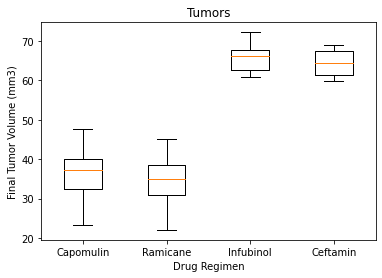

In [73]:
tumor =[]
for drug in drugs:
    all_df =(final_tp.loc[final_tp["Drug Regimen"] == drug])
    #final_fourlast = pd.merge(all_df, final_tp, how="left", on=["Mouse ID", "Mouse ID"])
    tumor.append(all_df["Tumor Volume (mm3)"])


data_to_plot = tumor
fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=drugs)
plt.show()

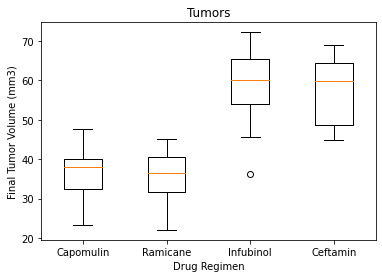

In [69]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest ( I could not get the graphs to look like the key ddoing the for lopp so I did it the long way)
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ram_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
inf_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceft_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplastvol = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, clean_df, on=("Mouse ID","Timepoint"),how="left")

ramlast = ram_df.groupby('Mouse ID').max()['Timepoint']
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, clean_df, on=("Mouse ID","Timepoint"),how="left")

inflast = inf_df.groupby('Mouse ID').max()['Timepoint']
inflastvol = pd.DataFrame(inflast)
inflastmerge = pd.merge(inflastvol, clean_df, on=("Mouse ID","Timepoint"),how="left")

ceftlast = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceftlastvol = pd.DataFrame(ceftlast)
ceftlastmerge = pd.merge(ceftlastvol, clean_df, on=("Mouse ID","Timepoint"),how="left")

cap_tumor = caplastmerge['Tumor Volume (mm3)']
ram_tumor = ramlastmerge['Tumor Volume (mm3)']
inf_tumor = inflastmerge['Tumor Volume (mm3)']
ceft_tumor = ceftlastmerge['Tumor Volume (mm3)']
data_to_plot = [cap_tumor, ram_tumor, inf_tumor, ceft_tumor]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

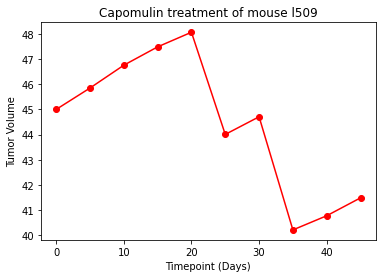

In [63]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
cap_df

line_plt = cap_df.loc[cap_df['Mouse ID']== 'l509',:]
line_plt

time = line_plt['Timepoint']
tumor = line_plt['Tumor Volume (mm3)']


plt.plot(time,tumor, color = 'red', marker = 'o', label = ())
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume')


plt.savefig('linechart')
plt.show()

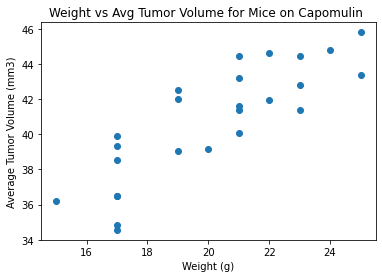

In [64]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs Avg Tumor Volume for Mice on Capomulin ')
plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

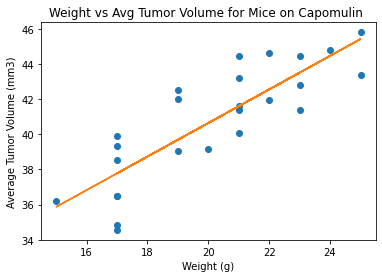

The correlation between weight and average tumor volume is 0.84


In [70]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capavg['Weight (g)']
y = capavg['Tumor Volume (mm3)']
plt.plot(x,y,'o')
m,b = np.polyfit(x,y,1)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs Avg Tumor Volume for Mice on Capomulin ')
plt.plot(x,m*x+b)
plt.show()
tumor = capavg['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between weight and average tumor volume is {round(correlation[0],2)}")

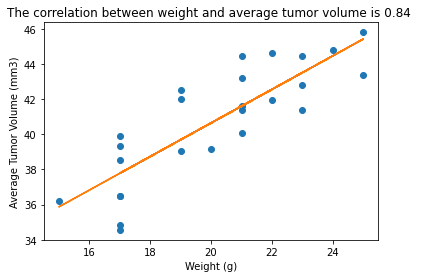

In [71]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x = capavg['Weight (g)']
y = capavg['Tumor Volume (mm3)']
plt.plot(x,y,'o')
m,b = np.polyfit(x,y,1)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('The correlation between weight and average tumor volume is 0.84 ')
plt.plot(x,m*x+b)
plt.show()
